<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/bell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scraping at WeCloudData
Manny Brar, Lexie Li, Farius Tjioesman - 24 September 2020

As part of icebreaking exercise at the beginning of data science diploma program in Fall 2020, Team 2 picked Freedom Mobile case as well as its interaction with other big 3 players (Bell, Roges and Telus). Manny, Lexie and Farius made the successful overall presentation.

Below codes focus more on python part and its libraries and not going deeper into html syntax as I tried to minimize the scope of discussion.
Therefore dl-tile-img and dl-tile-full-price classes that are useful for this code inside bell.ca html won't be elaborated in details.

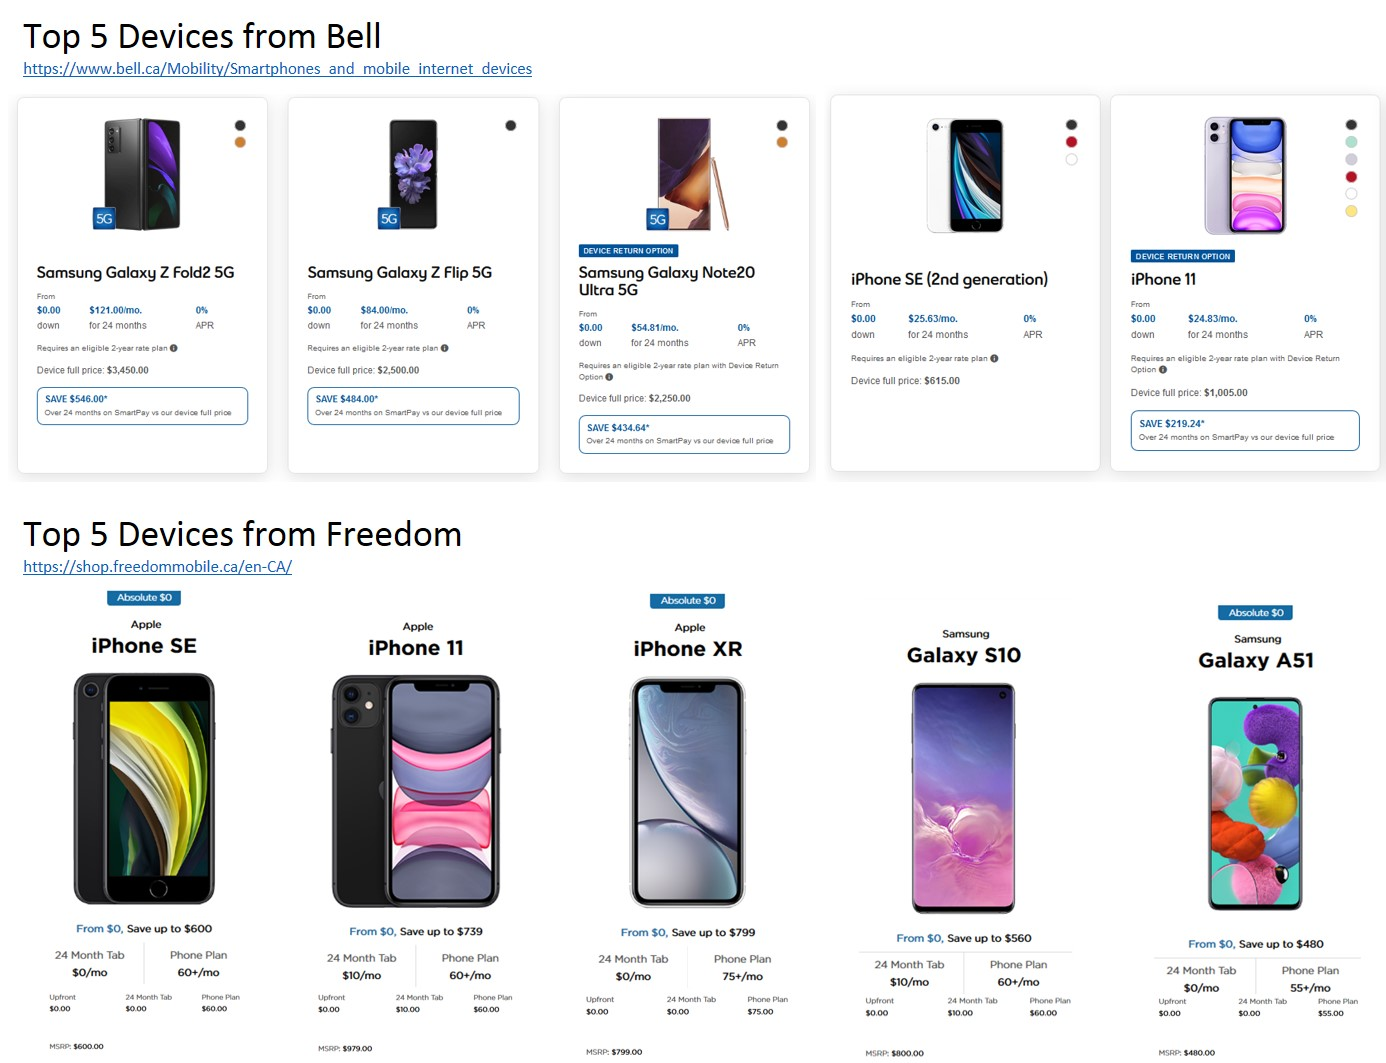

Regarding customer journey and strategy to retain or regain the customer - product offers or latest devices could be a major factor.
Customer could switch provider as they shop new devices. There are many ways to see top 5 within Bell or Freedom as presented above. 

The obvious strategy from Bell would be high-end, ultra portable computing that showcases Samsung Fold series and popular affordable iPhones. While Freedom strategy would be offering variety of plans (financing) on affordable iPhones and Samsung Galaxy series. 

There are many ways to present choices above as the customer start to shop around. Using conventional clipping by visiting each individual company website or using a web scraping tool with Python and Beautiful Soup package to extract, transform and load the data.


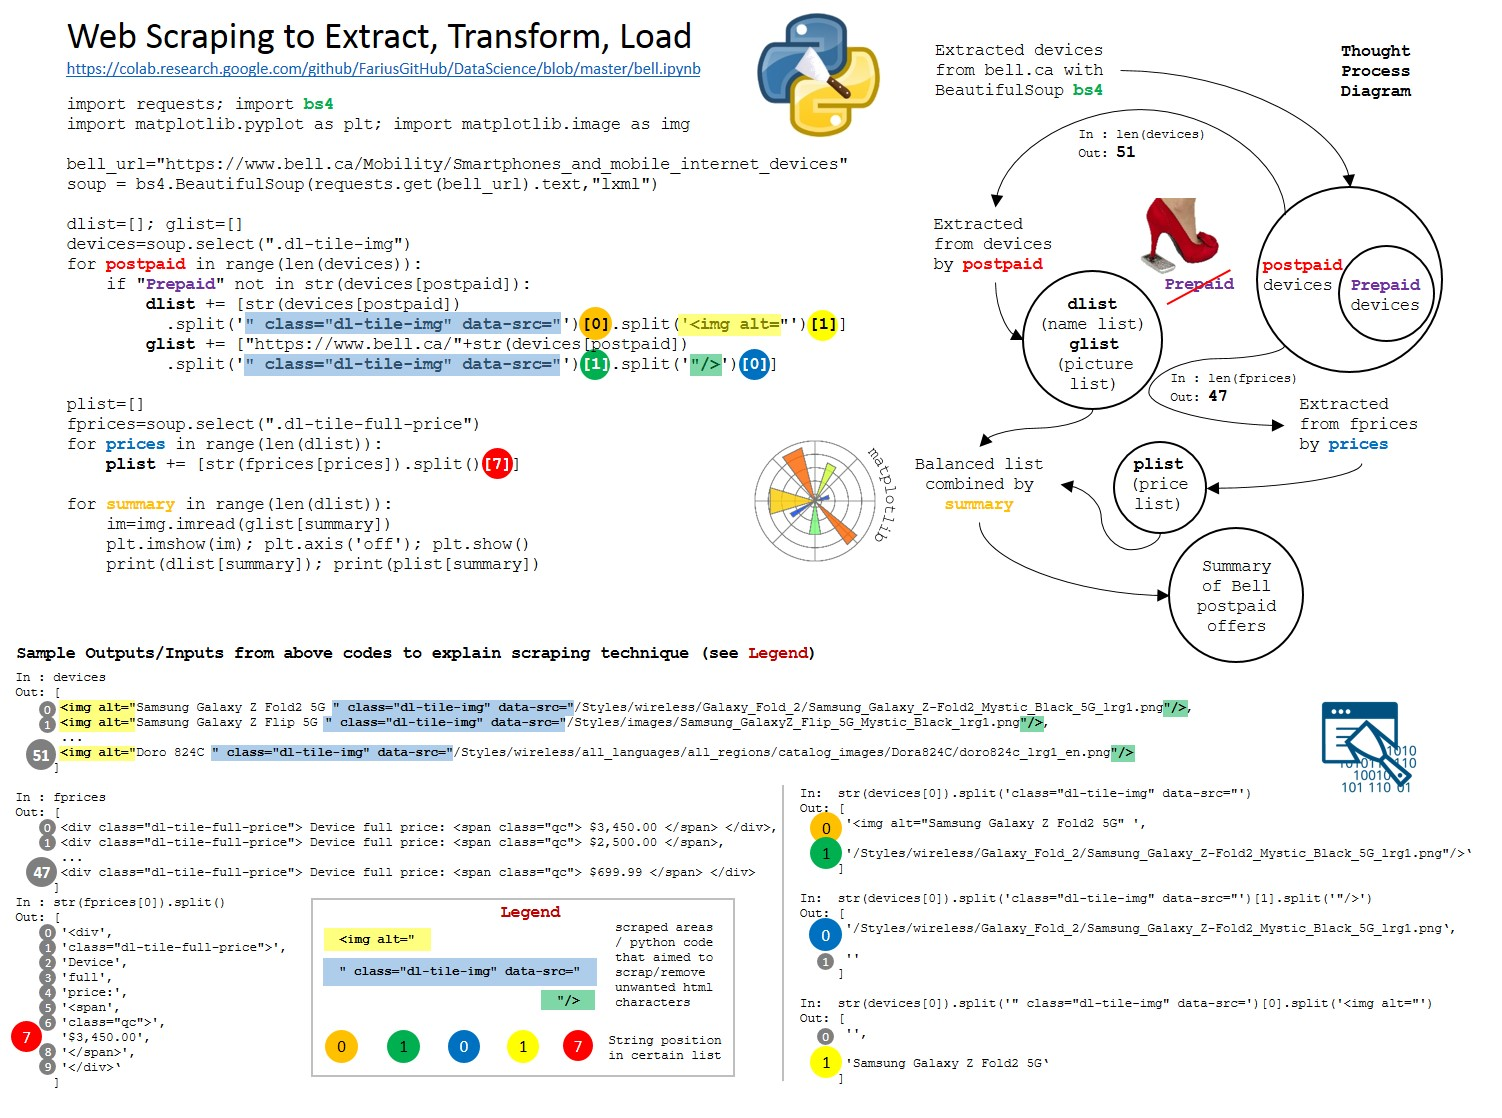

Using Python and BeautifulSoup/Requests packages bell website was converted into a string named soup. In this case Bell website is simpler than Freedom as it does not associated with Javascript and dynamic contents. It may need an advanced skill to webscrap Freedom website.

As per September 23, 2020 there are 51 devices offered by Bell , 47 prices available. The missing 4 are coming from prepaid devices which may also offered in those 47 postpaid devices. The balanced lists from devices and prices are extracted, transformed and loaded into Google Colab.

Scraping techniques and string positioning within the list are color-differentiated as above and illustrated in rectangle and circle formats. There are 3 loops used to extract and combine the lists of device names/images, prices and the combined one namely postpaid, prices and summary.

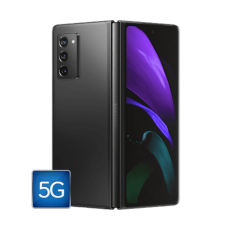

Samsung Galaxy Z Fold2 5G
$3,450.00


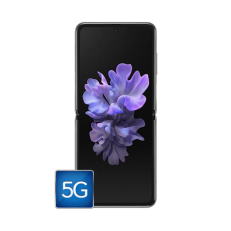

Samsung Galaxy Z Flip 5G
$2,500.00


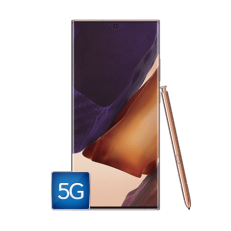

Samsung Galaxy Note20 Ultra 5G
$2,250.00


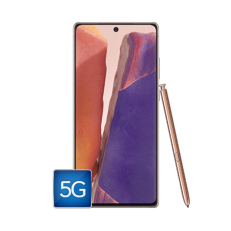

Samsung Galaxy Note20 5G
$1,730.00


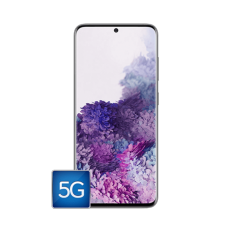

Samsung Galaxy S20 5G
$1,650.00


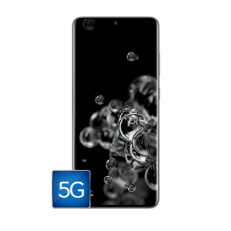

Samsung Galaxy S20 Ultra 5G
$2,300.00


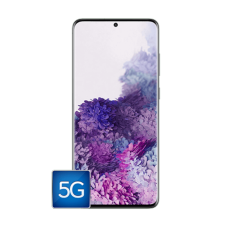

Samsung Galaxy S20+ 5G
$2,000.00


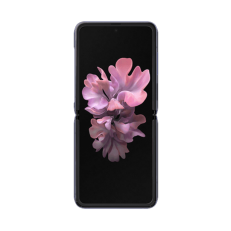

Samsung Galaxy Z Flip
$1,819.99


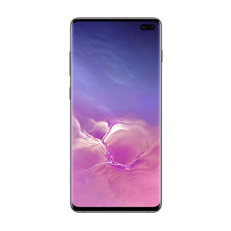

Samsung Galaxy S10+
$1,574.99


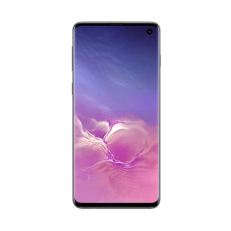

Samsung Galaxy S10
$1,399.99


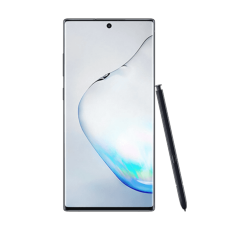

Samsung Galaxy Note10+
$1,699.99


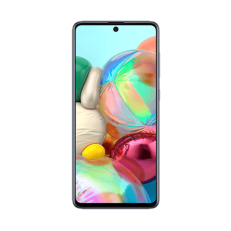

Samsung Galaxy A71
$700.00


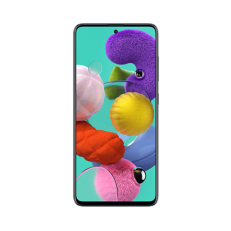

Samsung Galaxy A51
$560.00


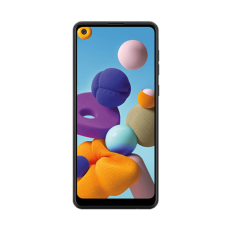

Samsung Galaxy A21
$360.00


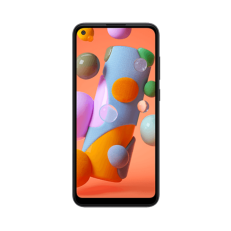

Samsung Galaxy A11
$250.00


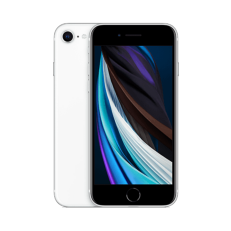

iPhone SE (2nd generation)
$615.00


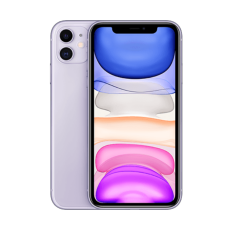

iPhone 11
$1,005.00


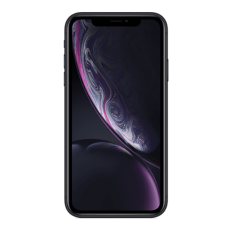

iPhone XR
$820.00


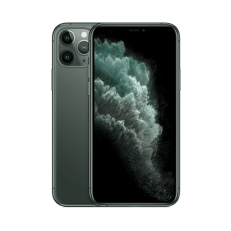

iPhone 11 Pro
$1,415.00


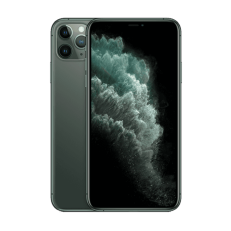

iPhone 11 Pro Max
$1,555.00


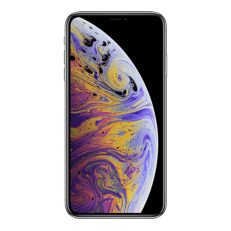

iPhone XS Max
$1,425.00


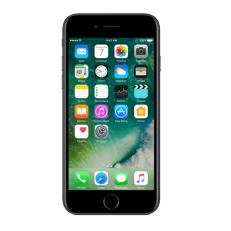

iPhone 7
$431.00


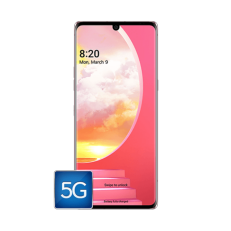

LG Velvet 5G
$750.00


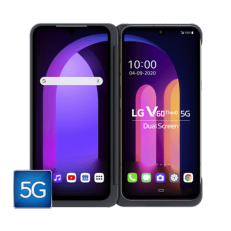

LG V60 ThinQ 5G Dual Screen
$1,100.00


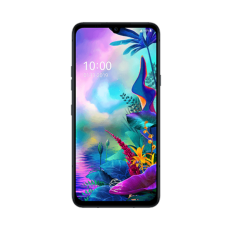

LG G8X ThinQ
$715.00


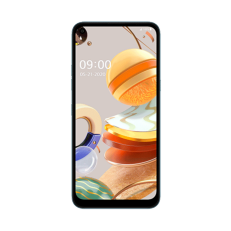

LG K61
$410.00


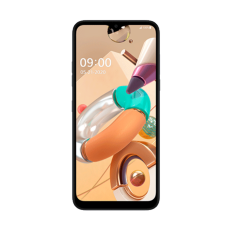

LG K41S
$260.00


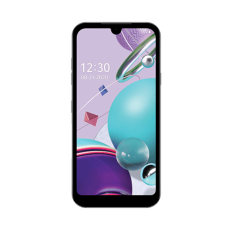

LG K31
$139.99


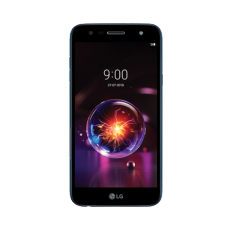

LG X Power 3
$259.99


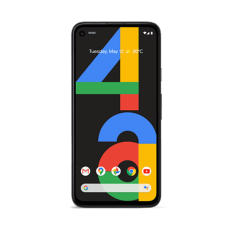

Google Pixel 4a
$560.00


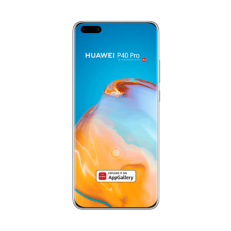

Huawei P40 Pro
$1,750.00


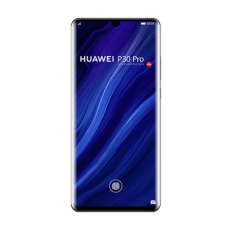

Huawei P30 Pro
$1,199.99


IncompleteRead: IncompleteRead(15959 bytes read, 5740 more expected)

In [ ]:
#Important components to read html for web scraping
import requests
import bs4          

#Essential components to show devices from png files 
import matplotlib.pyplot as plt
import matplotlib.image as img 

#importing Bell's latest devices offer in html format
bell_url="https://www.bell.ca/Mobility/Smartphones_and_mobile_internet_devices"
soup = bs4.BeautifulSoup(requests.get(bell_url).text,"lxml")

#Data wrangling for names and images, prepaid excluded
dlist=[]
glist=[]
devices=soup.select(".dl-tile-img")
for postpaid in range(len(devices)):
    if "Prepaid" not in str(devices[postpaid]):
        dlist += [str(devices[postpaid])
                  .split('" class="dl-tile-img" data-src="')[0]
                  .split('<img alt="')[1]]
        glist += ["https://www.bell.ca/"+str(devices[postpaid])
                  .split('" class="dl-tile-img" data-src="')[1]
                  .split('"/>')[0]]

#Data wrangling for the prices, no prepaid anymore here        
plist=[]
fprices=soup.select(".dl-tile-full-price")
for prices in range(len(dlist)):
    plist += [str(fprices[prices]).split()[7]]

#Combining device name/image list with device prices list        
for summary in range(len(dlist)):
    im=img.imread(glist[summary])
    plt.imshow(im)     
    plt.axis('off')
    plt.show()        
    print(dlist[summary])
    print(plist[summary])